In [1]:
# dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import csv
from distutils import text_file
from itertools import count


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df2 = pd.read_csv('data/topSubscribed.csv')
df2.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [3]:
df2 = pd.read_csv('data/topSubscribed.csv', index_col=0)
df2.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
Rank,,,,,,
1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [4]:
# show info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Youtube Channel  1000 non-null   object
 1   Subscribers      1000 non-null   object
 2   Video Views      1000 non-null   object
 3   Video Count      1000 non-null   object
 4   Category         1000 non-null   object
 5   Started          1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 54.7+ KB


In [5]:
# Examine shade
print(f'We have {df2.shape[0]} rows and {df2.shape[1]} colums in dataset.')

We have 1000 rows and 6 colums in dataset.


In [6]:
# Data Prep
list = ['Subscribers', 'Video Views', 'Video Count']
for i in list: 
    df2[i] = df2[i].str.replace(',', '')

In [7]:
for i in list:
    df2[i] = df2[i].astype('int64')

In [9]:
# check for  NaN
df2.isna().sum() / len(df2)

Youtube Channel    0.0
Subscribers        0.0
Video Views        0.0
Video Count        0.0
Category           0.0
Started            0.0
dtype: float64

In [10]:
# describe
df2.describe()

,Subscribers,Video Views,Video Count,Started
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,2.158140e+07,9.994912e+09,9416.228000,2012.594000
std,1.662556e+07,1.300546e+10,32190.909114,4.110238
min,1.140000e+07,0.000000e+00,0.000000,1970.000000
25%,1.340000e+07,3.871470e+09,365.500000,2010.000000
50%,1.660000e+07,6.723360e+09,896.000000,2013.000000
75%,2.320000e+07,1.223052e+10,3277.250000,2015.000000
max,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [11]:
df2 = df2[df2['Video Views'] != 0]


In [12]:
df2['Category'].unique()

array(['Music', 'Education', 'Shows', 'Entertainment', 'Gaming',
       'People & Blogs', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [13]:
df2[df2['Category'] =='https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels'].head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
Rank,,,,,,
107,Vlad và Niki,33900000,21008932630,457,https://us.youtubers.me/global/all/top-1000-mo...,2018
167,व्लाद और निकिता,28700000,17107973877,478,https://us.youtubers.me/global/all/top-1000-mo...,2018
220,Super JoJo - Nursery Rhymes & Kids Songs,24400000,1459730,8,https://us.youtubers.me/global/all/top-1000-mo...,2019
221,D Billions,24400000,27800456761,590,https://us.youtubers.me/global/all/top-1000-mo...,2019
255,Diana and Roma ARA,23000000,10504290129,544,https://us.youtubers.me/global/all/top-1000-mo...,2019


In [14]:
df2['Category'] = df2['Category'].replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', 'Other')

In [15]:
df2['Views_per_video'] = round(df2['Video Views'] / df2['Video Count'])

In [16]:
df2['Category'].unique()

array(['Music', 'Education', 'Shows', 'Entertainment', 'Gaming',
       'People & Blogs', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Other', 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [17]:
df2_grouped = df2.groupby('Category', as_index=False)\
[['Subscribers', 'Video Views', 'Video Count', 'Views_per_video']]\
.mean()

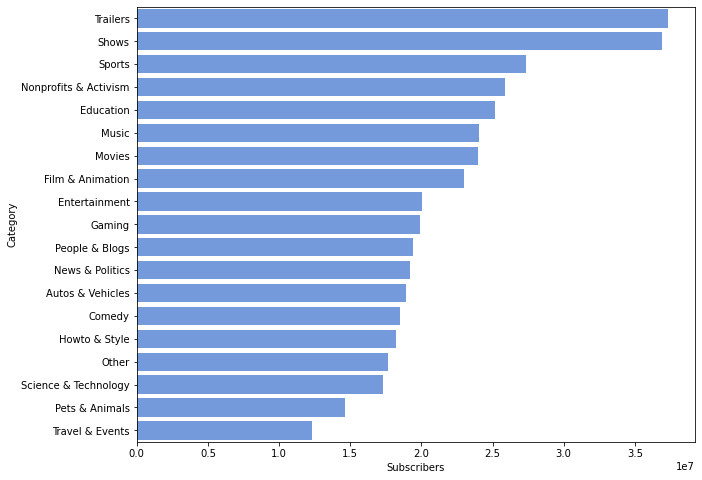

In [18]:
# number of subscribers
plt.figure(figsize=(10,8))
sns.barplot(x=df2_grouped['Subscribers'], y=df2_grouped['Category'],color='cornflowerblue',
            order=df2_grouped.sort_values('Subscribers', ascending=False).Category);

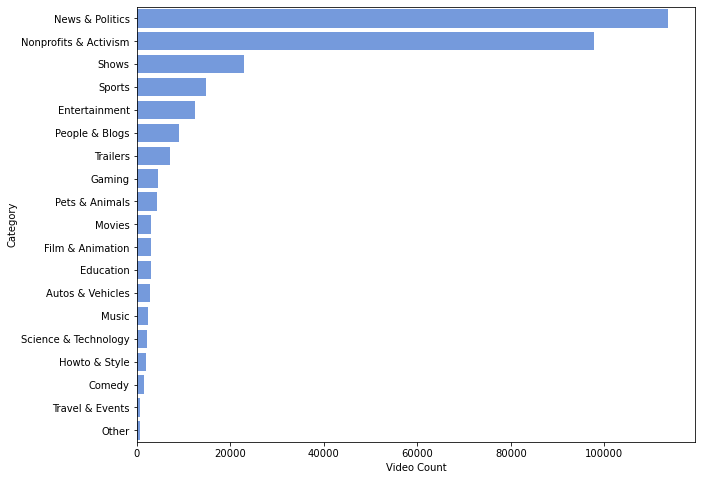

In [19]:
# Video Count
plt.figure(figsize=(10,8))
sns.barplot(x=df2_grouped['Video Count'], y=df2_grouped['Category'],color='cornflowerblue',
            order=df2_grouped.sort_values('Video Count', ascending=False).Category);

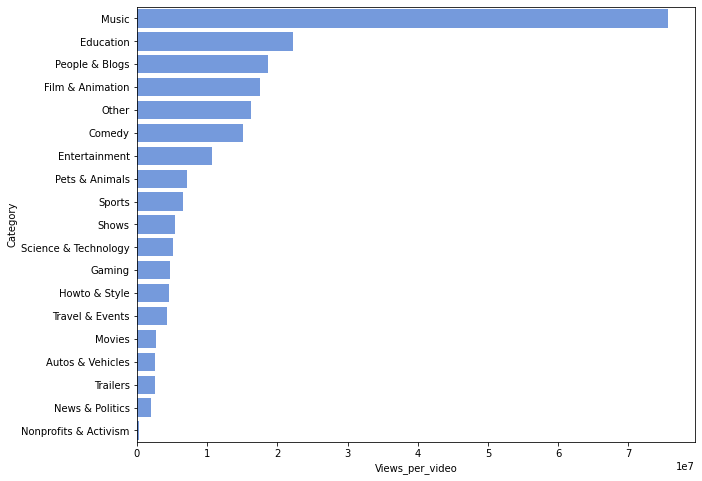

In [20]:
# Number of views per video
plt.figure(figsize=(10,8))
sns.barplot(x=df2_grouped['Views_per_video'], y=df2_grouped['Category'],color='cornflowerblue',
            order=df2_grouped.sort_values('Views_per_video', ascending=False).Category)



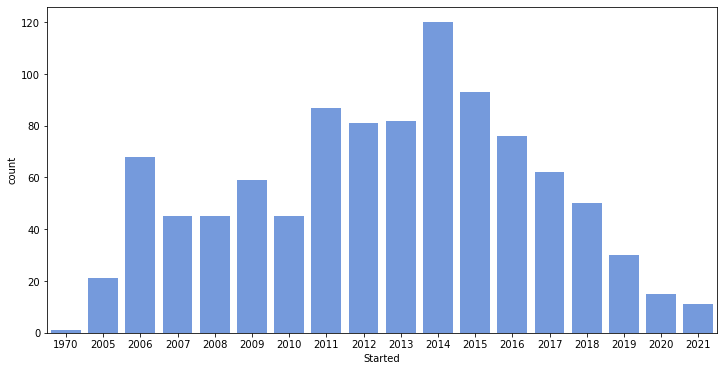

In [21]:
# Number of started youtube channels per year
plt.figure(figsize=(12,6))
sns.countplot(data = df2, x='Started', color='cornflowerblue');

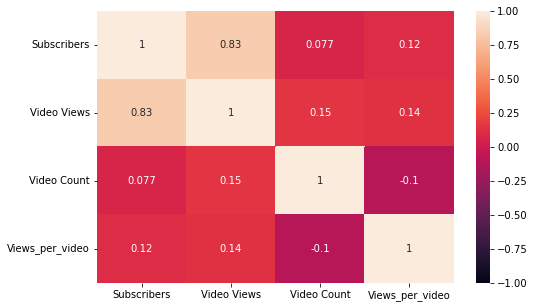

In [22]:
# Correlation
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(df2[['Subscribers', 'Video Views', 'Video Count', 'Views_per_video']].corr(),
                      vmin=-1, vmax=1, annot=True)

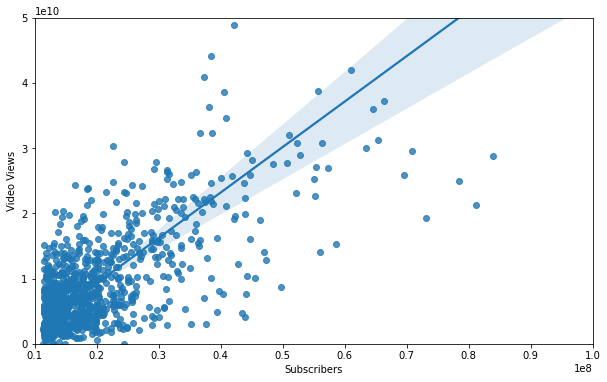

In [23]:
plt.figure(figsize=(10,6))
plt.ylim(0,50000000000)
plt.xlim(10000000,100000000)
sns.regplot(data=df2, x='Subscribers', y='Video Views');

In [26]:
#data=pd.DataFrame(df2, index = ['Rank','Youtube Channel','Subscribers','Video' 'Views','Video Count','Category','Started'])

In [24]:
df2.head()

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started,Views_per_video
Rank,,,,,,,
1,T-Series,234000000,212900271553,18515,Music,2006,11498799.0
3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006,176222433.0
4,SET India,150000000,137828094104,103200,Shows,2006,1335544.0
5,MrBeast,128000000,21549128785,733,Entertainment,2012,29398539.0
7,PewDiePie,111000000,28851883250,4694,Gaming,2010,6146545.0


,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started,Views_per_video
0,1,T-Series,234000000,212900271553,18515,Music,2006,11498799.0
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006,176222433.0
3,4,SET India,150000000,137828094104,103200,Shows,2006,1335544.0
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012,29398539.0
6,7,PewDiePie,111000000,28851883250,4694,Gaming,2010,6146545.0
...,...,...,...,...,...,...,...,...
665,666,Bispo Bruno Leonardo,14400000,2668391636,4175,Nonprofits & Activism,2016,639136.0
762,763,BBC,13200000,9296738948,14156,Pets & Animals,2005,656735.0
824,825,The Dodo,12800000,8683276984,7397,Pets & Animals,2014,1173892.0
879,880,Más SKabeche,12300000,2955450684,697,Travel & Events,2015,4240245.0


In [ ]:
df2

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
Rank,,,,,,
1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012
...,...,...,...,...,...,...
996,XO TEAM,"11,500,000","11,471,384,709","2,679",People & Blogs,2021
997,Nirahua Music World,"11,500,000","5,997,717,755",788,Music,2014
998,YtCrash,"11,400,000","3,825,084",1,Education,2015


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Youtube Channel  991 non-null    object 
 1   Subscribers      991 non-null    int64  
 2   Video Views      991 non-null    int64  
 3   Video Count      991 non-null    int64  
 4   Category         991 non-null    object 
 5   Started          991 non-null    int64  
 6   Views_per_video  991 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 101.9+ KB


In [29]:
df=pd.read_csv('data/topSubscribed.csv', index_col=0, dtype=object) 
df4=df.query("Category =='Music'")
df4.groupby(level=0)
df4
             


,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
Rank,,,,,,
1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
13,Zee Music Company,"91,600,000","53,352,597,784","7,530",Music,2014
19,BANGTANTV,"73,100,000","19,240,057,894","2,090",Music,2012
20,Justin Bieber,"70,800,000","29,598,652,357",249,Music,2007
21,HYBE LABELS,"69,600,000","25,947,702,825","1,070",Music,2008
...,...,...,...,...,...,...
963,elcarteldesantatv,"11,700,000","6,698,448,077",344,Music,2008
973,Mundo Bita,"11,600,000","15,080,936,964",195,Music,2011
979,Biper y sus Amigos,"11,600,000","5,200,224,730",148,Music,2012


In [30]:
pd.set_option('display.max_rows', None)

In [31]:
display(df4)

,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
Rank,,,,,,
1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
13,Zee Music Company,"91,600,000","53,352,597,784","7,530",Music,2014
19,BANGTANTV,"73,100,000","19,240,057,894","2,090",Music,2012
20,Justin Bieber,"70,800,000","29,598,652,357",249,Music,2007
21,HYBE LABELS,"69,600,000","25,947,702,825","1,070",Music,2008
22,Canal KondZilla,"66,300,000","37,179,407,050","2,383",Music,2012
25,Shemaroo Filmi Gaane,"63,500,000","29,992,048,346","8,464",Music,2010
30,T-Series Bhakti Sagar,"57,300,000","27,004,807,684","24,900",Music,2011
31,Tips Official,"56,300,000","30,741,513,673","4,102",Music,2007
